<a href="https://colab.research.google.com/github/WeizmannML/course2019/blob/master/Tutorial3/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving IMAGE_AUGMENTATION.zip to IMAGE_AUGMENTATION.zip
Saving Malaria_Images.zip to Malaria_Images.zip


In [3]:
!ls -a 

.   .config		    Malaria_Images.zip	william-low-148469-unsplash.jpg
..  IMAGE_AUGMENTATION.zip  sample_data


In [4]:
!unzip IMAGE_AUGMENTATION.zip
!unzip Malaria_Images.zip
!mv william-low-148469-unsplash.jpg tiger.jpg

Archive:  IMAGE_AUGMENTATION.zip
   creating: IMAGE_AUGMENTATION/
   creating: IMAGE_AUGMENTATION/NEW_IMAGES/
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image2061.png  
   creating: __MACOSX/
   creating: __MACOSX/IMAGE_AUGMENTATION/
   creating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image2061.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image861.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image861.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image1568.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image1568.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image2075.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image2075.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image875.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image875.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image1232.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image1232.png  
  

In [0]:
!mkdir data

In [0]:
!mv Malaria_Images data/

In [0]:
!mv IMAGE_AUGMENTATION data

## Dataset taken from : https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [0]:
#!mv william-low-148469-unsplash.jpg tiger.jpg

## Lets look into an image and try to understand how a filter works

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import cv2
import numpy as np

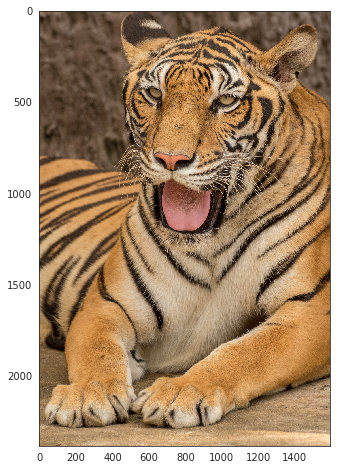

In [10]:
plt.rcParams["figure.figsize"]=8,8
image = mpimg.imread('tiger.jpg')
with sns.axes_style("white"):
    plt.imshow(image)

## If we set a random filter, what will be the output ?

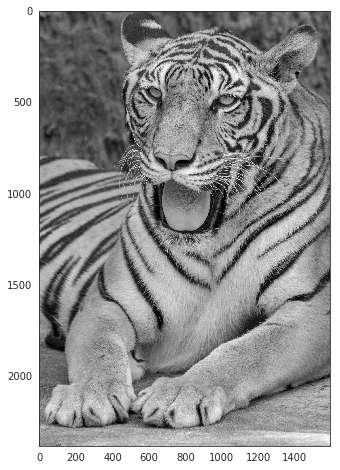

In [11]:

img_path = 'tiger.jpg'

bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Normalise
gray_img = gray_img.astype("float32")/255

with sns.axes_style("white"):
    plt.imshow(gray_img, cmap='gray')
plt.show()

In [12]:
gray_img.shape, image.shape

((2385, 1592), (2385, 1592, 3))

## Define the Sobel filter and scan our image

In [0]:
# the filter popular for edge ditection 
# also available through scipy.ndimage.sobel(image)

sobel = np.array([[-1., -2., -1.],
                  [ 0.,  0.,  0.],
                  [ 1.,  2.,  1. ]
                   ])

# filter = np.array([[-1., -1., -1.],
#                    [-1.,  8., -1.],
#                    [-1., -1., -1. ]
#                    ])


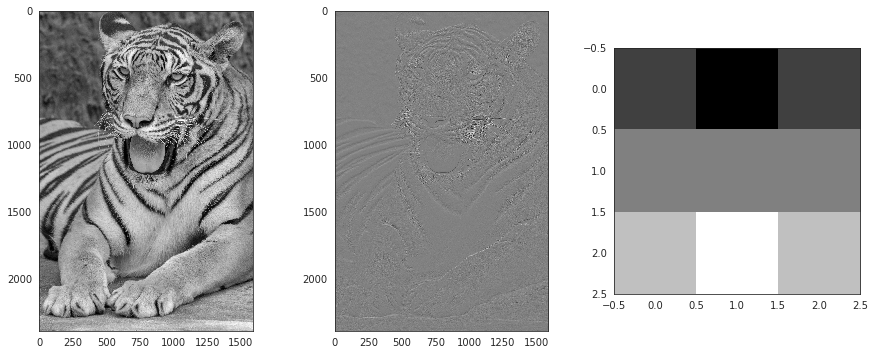

In [14]:
filtered_gray_img = cv2.filter2D(gray_img, -1, sobel)


# ----- compare the plots ------ #
plt.rcParams["figure.figsize"]=15,20
with sns.axes_style("white"):
    plt.subplot(331)
    plt.imshow(gray_img, cmap='gray')
    plt.subplot(332)
    plt.imshow(filtered_gray_img, cmap='gray')
    plt.subplot(333)
    plt.imshow(sobel, cmap='gray')

plt.show()

## Example of Convolution

## Building a CNN in pytorch

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import TensorDataset
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.autograd import Variable

In [0]:
# ---- define the device ---- #
# ---- already GPU in colab ------ #
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # -- the device will be set to 'GPU' if available else will stick to CPU ---- #

In [0]:
#nn.Conv2d??

nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

In [0]:
conv2d_layer1 = nn.Conv2d(in_channels=3,out_channels=3,kernel_size=(4,4) ) # --- declare a Conv2D layer to give 3 output channels --- #

In [19]:
image_shape = image.shape
print( 'Original shape : ', image_shape )

new_shape = tuple( [1] + list(image_shape) )

print( 'New shape : ', new_shape )


image1 = image.reshape(new_shape ).transpose(0,3,1,2)


#np.reshape(image, new_shape)

#print(image1.shape)
image1 = conv2d_layer1(  torch.from_numpy(image1).type('torch.FloatTensor')  )
print( 'Shape after convolution: ', image1.shape)
#print(image1.view(3, 2382, 1589).shape)

Original shape :  (2385, 1592, 3)
New shape :  (1, 2385, 1592, 3)
Shape after convolution:  torch.Size([1, 3, 2382, 1589])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


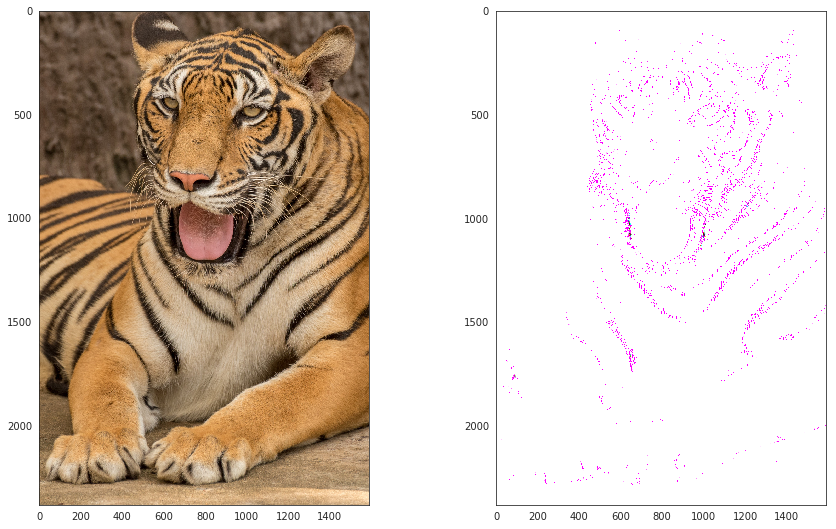

In [20]:
# ----- compare the plots ------ #
plt.rcParams["figure.figsize"]=15,20
with sns.axes_style("white"):
    plt.subplot(221)
    plt.imshow(image)
    plt.subplot(222)
    plt.imshow(image1.view(3, 2382, 1589).detach().numpy().transpose(1,2,0)  )
#     plt.subplot(333)
#     plt.imshow(sobel, cmap='gray')

plt.show()

## What were the weights which did the mapping ?

In [21]:
weight = conv2d_layer1.weight.data.numpy()
weight.shape


(3, 3, 4, 4)

The initialization was arbitray .. so repeat this

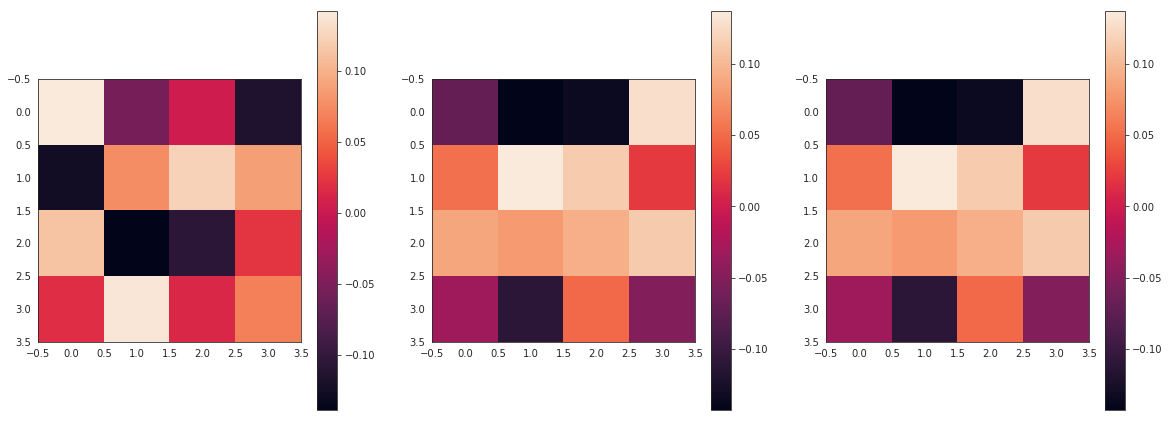

In [22]:
# ----- compare the plots ------ #
plt.rcParams["figure.figsize"]=20,25
with sns.axes_style("white"):
  
    plt.subplot(331)
    plt.imshow(weight[0][0])
    plt.colorbar()
    plt.subplot(332)
    plt.imshow(weight[1][0])
    plt.colorbar()
    plt.subplot(333)
    plt.imshow(weight[1][0])
    plt.colorbar()
    
plt.show()

## Download the Malaria dataset

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

# import os
# print(os.listdir("./data/cell_images/cell_images/"))

In [24]:
!ls -a  data/Malaria_Images

.  ..  .DS_Store  Parasitized  Uninfected


In [0]:
img_path = Path('./data/Malaria_Images/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data.classes

['Parasitized', 'Uninfected']

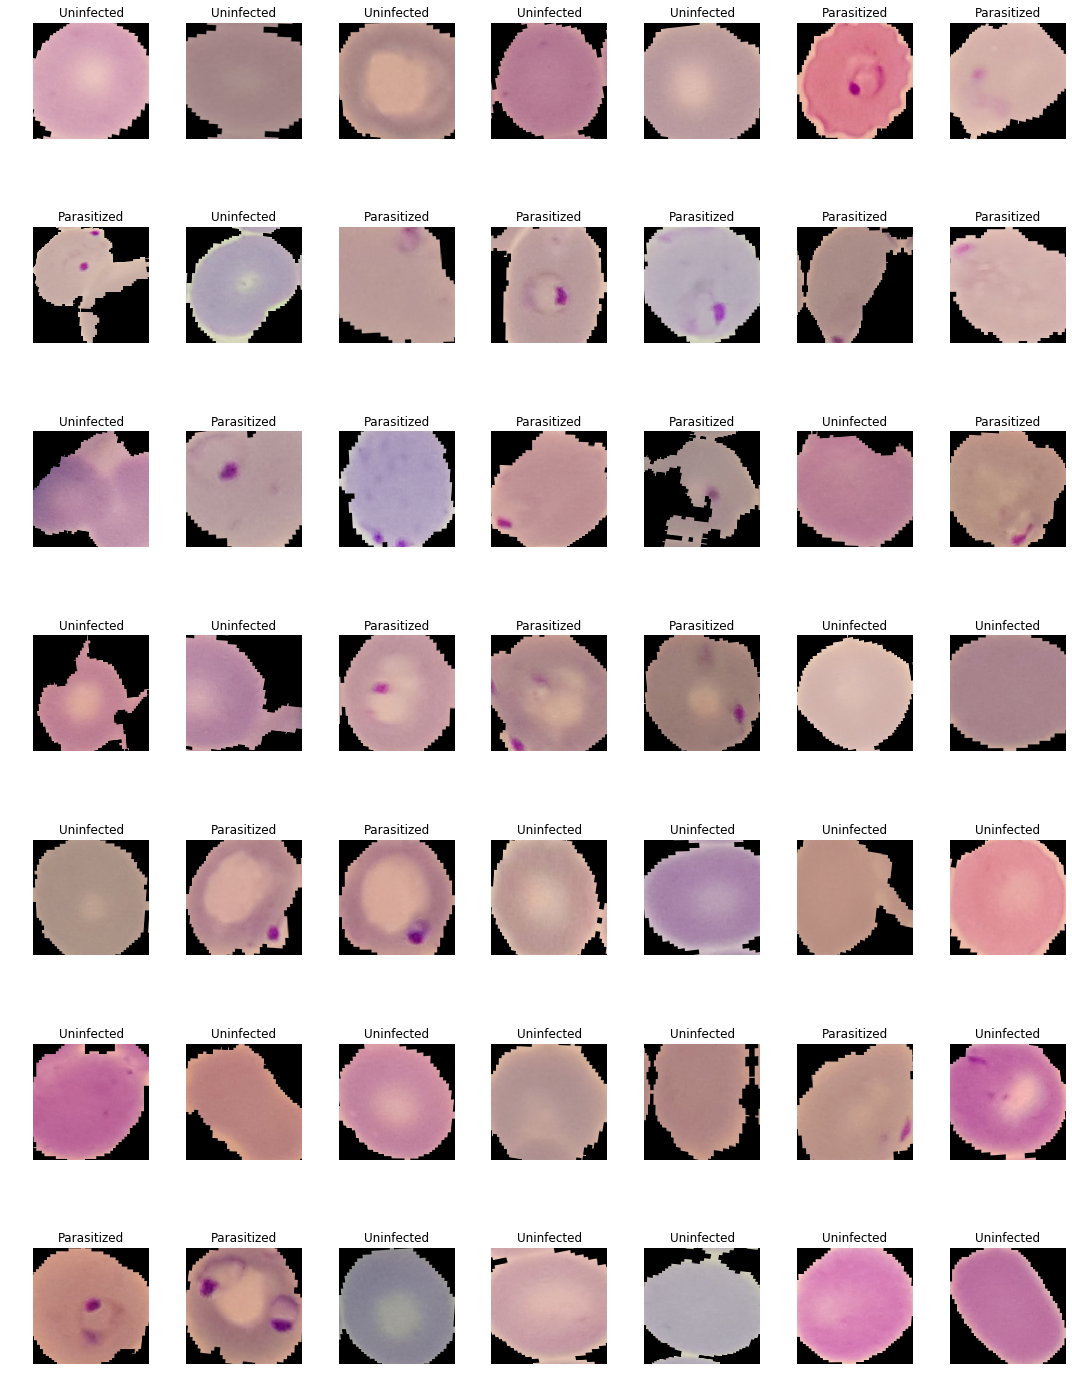

In [28]:
data.show_batch(rows=7, figsize=(15,20))

In [0]:
#open_mask??

In [0]:
#nn.Conv2d??


## Build the model out of Conv2D, ReLu : ----> Liner ----- > # of classes 

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(3,16,kernel_size=4)
        self.pool1=nn.MaxPool2d(kernel_size=(3,3),stride=2)
        self.conv2=nn.Conv2d(16,32,kernel_size=(4,4))
        self.pool2=nn.MaxPool2d(kernel_size=(3,3),stride=2)
        self.conv3=nn.Conv2d(32,64,kernel_size=(4,4))
        self.pool3=nn.MaxPool2d(kernel_size=(4,4),stride=2)
        self.fc1=nn.Linear(4*4*64,500)
        self.fc2=nn.Linear(500,100)
        self.fc3=nn.Linear(100,2)
        self.dropout=nn.Dropout(0.3)
        
    def forward(self, x):
        
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.dropout(x)
        x=self.pool2(F.relu(self.conv2(x)))
        x=self.dropout(x)
        x=self.pool3(F.relu(self.conv3(x)))
        x=self.dropout(x)
        x=x.reshape( -1,4*4*64)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        return x
      
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.pool1(x)
        
#         x=self.dropout(x)
        
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = self.pool2(x)
        
#         x=self.dropout(x)
        
#         x = self.conv3(x)
#         x = F.relu(x)
#         x = self.pool3(x)
        
#         x=self.dropout(x)
        
#         x=x.reshape( -1,4*4*64)
        
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout(x)
        
#         x = self.fc2(x)
#         x = F.relu(x)
#         x = self.dropout(x)
        
#         x=self.fc3(x)
#         return x
        
        
        
        
        



In [0]:
#transforms.Normalize??

In [0]:
##Design a  preprocessor using pytorch functions ###

train_transforms = transforms.Compose([transforms.RandomResizedCrop(64), ## crops the image suitable, later returns same aspect ratio
                                       transforms.ToTensor(),            ## turns the image : numpy-tensor to torch tensor
                                       transforms.Normalize([0.5, 0.5, 0.5], ## applies normalization on each channel ---- mean, sigma ----
                                                            [0.5, 0.5, 0.5])
                                       
                                       ])

## Building the dataloader in PYTORCH

In [0]:
img_dir='./data/Malaria_Images/'
train_data = torchvision.datasets.ImageFolder(img_dir,transform=train_transforms) ## read the input images and apply pre-defined transformation --

In [53]:
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use as validation
valid_size = 0.2

test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]

print(f'val_index: {len(valid_idx)},test_index: {len(test_idx)},train_index: {len(train_idx)}')

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=101,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=33, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=106,
    sampler=test_sampler, num_workers=num_workers)

val_index: 534,test_index: 267,train_index: 1871


In [0]:
#len(train_loader)

In [0]:
model_cnn = Net()
loss_func = nn.CrossEntropyLoss()

In [0]:
#print(model)
#del model

# Relook the model

In [57]:
print(model_cnn)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
  (dropout): Dropout(p=0.3)
)


In [0]:
if torch.cuda.is_available():
    model_cnn = model_cnn.cuda()

## Do the training 

In [0]:
### ----- Define the optimizer here ------ ###
optimizer = optim.Adam(model_cnn.parameters(), lr=0.0001)
total_step = len(train_loader)

In [0]:
train_loss_v, valid_loss_v = [], []

In [61]:
# number of epochs to train the model
n_epochs = 100

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_cnn.train() ## --- set the model to train mode -- ##
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_cnn(data)
        # calculate the batch loss
        loss = loss_func(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()#*data.size(0)
        
#         if (epoch) % 2 == 0:
#             print ('Epoch [{}/{}], Loss: {:.4f}' 
#                    .format(epoch, n_epochs, loss.item()))
        
    ######################  
    
    
    
    ######################    
    # validate the model #
    ######################
    model_cnn.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_cnn(data)
        # calculate the batch loss
        loss = loss_func(output, target)
        # update average validation loss 
        valid_loss += loss.item()#*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    train_loss_v.append(train_loss) 
    valid_loss_v.append(valid_loss)
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_cnn.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.004949 	Validation Loss: 0.004447
Validation loss decreased (inf --> 0.004447).  Saving model ...
Epoch: 2 	Training Loss: 0.004914 	Validation Loss: 0.004431
Validation loss decreased (0.004447 --> 0.004431).  Saving model ...
Epoch: 3 	Training Loss: 0.004893 	Validation Loss: 0.004421
Validation loss decreased (0.004431 --> 0.004421).  Saving model ...
Epoch: 4 	Training Loss: 0.004883 	Validation Loss: 0.004410
Validation loss decreased (0.004421 --> 0.004410).  Saving model ...
Epoch: 5 	Training Loss: 0.004863 	Validation Loss: 0.004401
Validation loss decreased (0.004410 --> 0.004401).  Saving model ...
Epoch: 6 	Training Loss: 0.004806 	Validation Loss: 0.004380
Validation loss decreased (0.004401 --> 0.004380).  Saving model ...
Epoch: 7 	Training Loss: 0.004731 	Validation Loss: 0.004335
Validation loss decreased (0.004380 --> 0.004335).  Saving model ...
Epoch: 8 	Training Loss: 0.004565 	Validation Loss: 0.004199
Validation loss decreased (0.00433

In [0]:
##torch.no_grad??

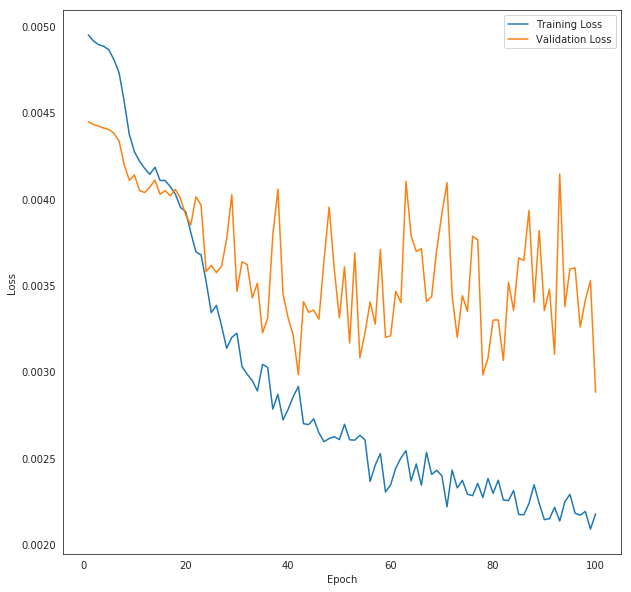

In [63]:
plt.rcParams["figure.figsize"]=10,10
with sns.axes_style("white"):
  plt.plot( range(1, n_epochs+1), np.array(train_loss_v), label='Training Loss' )
  plt.plot( range(1, n_epochs+1), np.array(valid_loss_v), label='Validation Loss' )
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
plt.show()

## Check the performance of the training 

In [64]:
# Test the model
model_cnn.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():  # the gradient computation is off .. saves memory while doing the eval #
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 83.14606741573034 %


See the state of the model after these epochs of training
------------------------------------------------------------------

In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_cnn.state_dict():
    print(param_tensor, "\t", model_cnn.state_dict()[param_tensor].size())

# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([16, 3, 4, 4])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([32, 16, 4, 4])
conv2.bias 	 torch.Size([32])
conv3.weight 	 torch.Size([64, 32, 4, 4])
conv3.bias 	 torch.Size([64])
fc1.weight 	 torch.Size([500, 1024])
fc1.bias 	 torch.Size([500])
fc2.weight 	 torch.Size([100, 500])
fc2.bias 	 torch.Size([100])
fc3.weight 	 torch.Size([2, 100])
fc3.bias 	 torch.Size([2])


In [0]:
model_state_dict = model_cnn.state_dict()

In [0]:
model_state_dict.keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

In [0]:
model_state_dict['conv1.weight'].shape  # model_state_dict['conv1.weight'] returns you all the trained weights of conv1 layer

torch.Size([16, 3, 4, 4])

This way its possible to extract how the weight of each layer is changing  after each epoch

In [0]:
child_counter = 0
for child in model_cnn.children():
    print(" child", child_counter, "is -")
    print(child)
    child_counter += 1

 child 0 is -
Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
 child 1 is -
MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 2 is -
Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
 child 3 is -
MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 4 is -
Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
 child 5 is -
MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 6 is -
Linear(in_features=1024, out_features=500, bias=True)
 child 7 is -
Linear(in_features=500, out_features=100, bias=True)
 child 8 is -
Linear(in_features=100, out_features=2, bias=True)
 child 9 is -
Dropout(p=0.3)


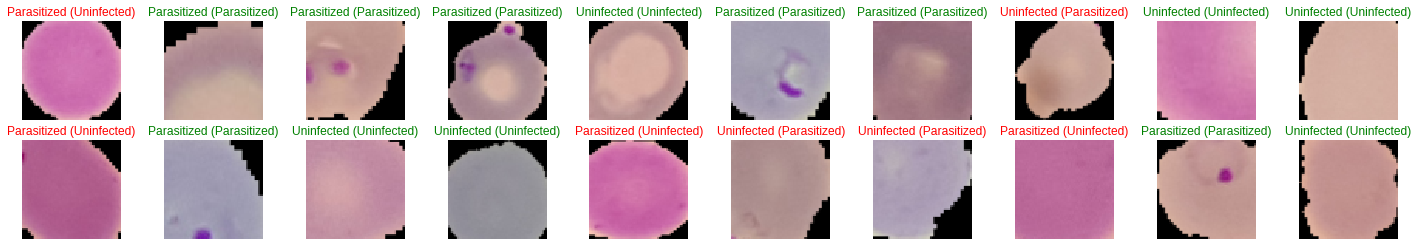

In [0]:
classes = ['Parasitized', 'Uninfected']

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()

# get sample outputs
output = model_cnn(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [0]:
#layer1 = model_cnn.children()[0]

What is each layer learning ? 
--------------------------------------

## IMAGE AUGMENTATION

In [0]:
!ls -a data

.  ..  IMAGE_AUGMENTATION  Malaria_Images


In [0]:
path_img = Path('./data/IMAGE_AUGMENTATION') # -- switching to fastai function

In [0]:
path_img.ls()

[PosixPath('data/IMAGE_AUGMENTATION/.DS_Store'),
 PosixPath('data/IMAGE_AUGMENTATION/codes.txt'),
 PosixPath('data/IMAGE_AUGMENTATION/ValidationFile.txt'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES')]

In [0]:
path_lbl = path_img/'NEW_IMAGES_MASK'
path_img = path_img/'NEW_IMAGES'

In [0]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image2506.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image942.png')]

In [0]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask1896.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask856.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask1763.png')]

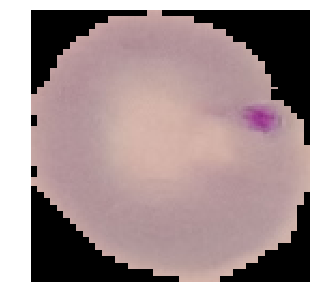

In [0]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

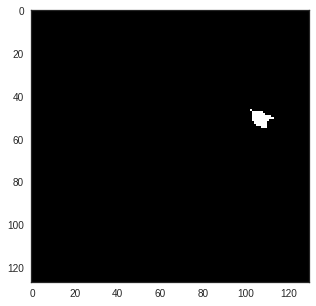

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=5,5
image = mpimg.imread('./data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask675.png')
with sns.axes_style("white"):
   plt.imshow(image)

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
def GetMaskImage(image_path) : 
  
  name = image_path.split("/")
  name = name[ len(name) -1 ]
  
  name = name.split('.')
  name = name[0]
  
  name1 = name.replace('Image', '')
  
  outname = 'data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask' + name1 + '.png'
  
  return Path(outname)

In [0]:
#GetMaskImage('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png')

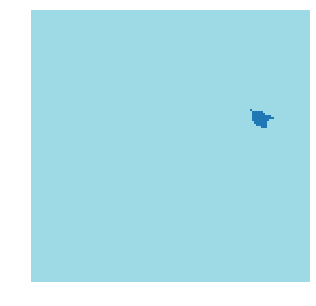

In [0]:
mask = open_mask( GetMaskImage('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png')  )
mask.show(figsize=(5,5), alpha=1)

In [0]:
codes = np.loadtxt(path_img/'../codes.txt', dtype=str); codes

array(['Parasitized', 'Uninfected'], dtype='<U11')

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([127, 130]), tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]]))

In [0]:
size = src_size//2

# free = gpu_mem_get_free_no_cache()
# # the max size of bs depends on the available GPU RAM
# if free > 8200: bs=8
# else:           bs=4
# print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
src = (SegmentationItemList.from_folder(path_img))

fastai.vision.data.SegmentationLabelList

In [0]:
# # data = (src.transform(get_transforms(), size=size, tfm_y=True)
# #         .databunch(bs=bs)
# #         .normalize(imagenet_stats))

# data = src.databunch(bs=8).normalize(imagenet_stats)

In [0]:
Variable??